In [9]:
# Import libraries
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure


In [8]:
# Load datasets
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Convert labels to 1-D vector
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()
# Names of classes
name_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Compute Local Binary Pattern of image
def compute_lbp(image):
    lbp_image = np.zeros(image.shape, dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1) # Padding to ensure output image is of same size as input
    rows, cols = padded_image.shape
    # Form binary vector using 8 neighboring pixels and convert to decimal simultaneously 
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = padded_image[i, j] 
            code = 0
            # Left shift by n is same as multiplication by 2 to the power n
            code |= (padded_image[i - 1, j - 1] > center) << 7
            code |= (padded_image[i - 1, j] > center) << 6
            code |= (padded_image[i - 1, j + 1] > center) << 5
            code |= (padded_image[i, j + 1] > center) << 4
            code |= (padded_image[i + 1, j + 1] > center) << 3
            code |= (padded_image[i + 1, j] > center) << 2
            code |= (padded_image[i + 1, j - 1] > center) << 1
            code |= (padded_image[i, j - 1] > center) << 0
            lbp_image[i - 1, j - 1] = code

    return lbp_image


Text(0.5, 1.0, 'SIFT')

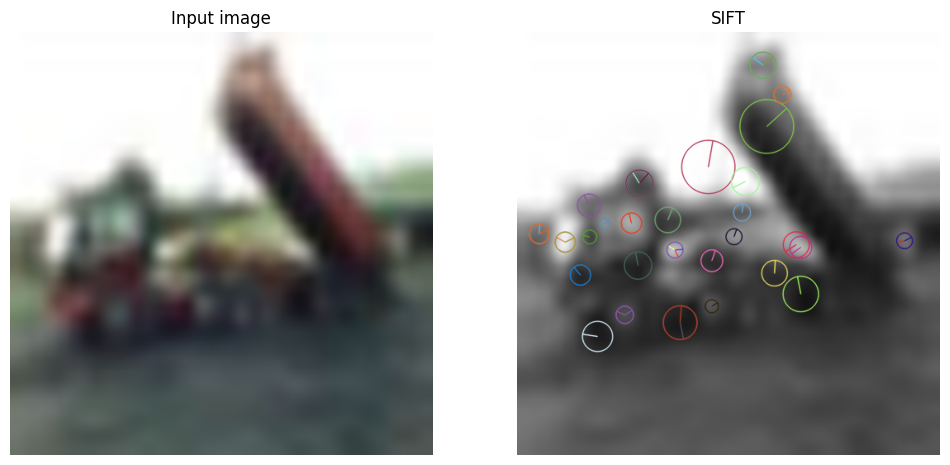

In [23]:
# Display SIFT features for sample image from training set
sift_vis = cv2.SIFT_create()
img_vis_sift = train_images[2].astype(np.uint8)
# Upscale to visualize
img_vis_sift = cv2.resize(img_vis_sift, (512, 512), interpolation = cv2.INTER_CUBIC)

gray_vis_sift = cv2.cvtColor(img_vis_sift,cv2.COLOR_BGR2GRAY)
kp, des = sift_vis.detectAndCompute(gray_vis_sift,None)
out_vis_sift = img_vis_sift.copy()
out_vis_sift = cv2.drawKeypoints(gray_vis_sift, kp, out_vis_sift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_vis_sift, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(out_vis_sift, cmap=plt.cm.gray)
ax2.set_title('SIFT')

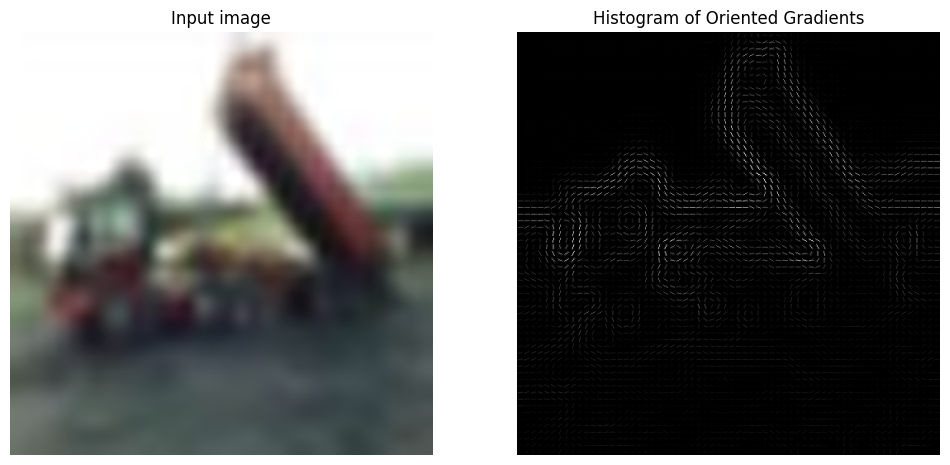

In [24]:
# Display HOG features for same image
image_vis_hog = train_images[2]
image_vis_hog = cv2.resize(image_vis_hog, (512, 512), interpolation = cv2.INTER_CUBIC)

fd, hog_image = hog(
    image_vis_hog,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image_vis_hog, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Text(0.5, 1.0, 'SIFT')

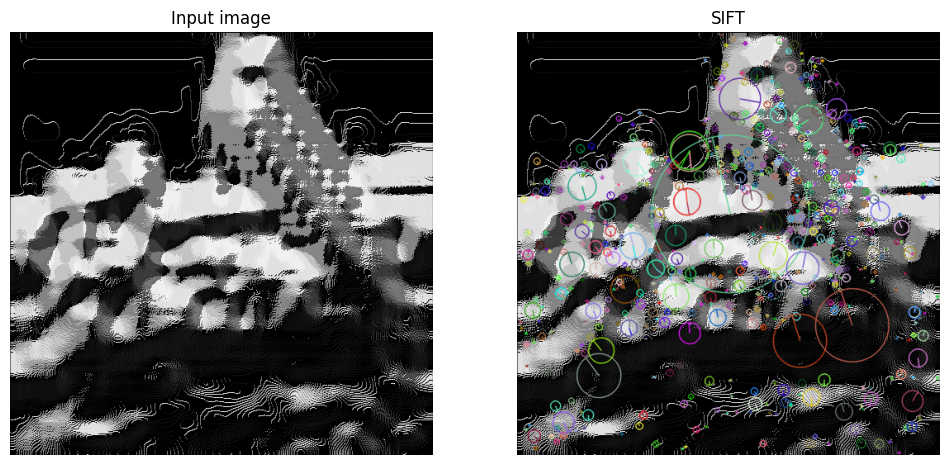

In [42]:
# Display SIFT features for same image after computing LBP of each pixel
sift_vis = cv2.SIFT_create()
img_vis_sift = train_images[2].astype(np.uint8)
img_vis_sift = cv2.resize(img_vis_sift, (512, 512), interpolation = cv2.INTER_CUBIC)

gray_vis_sift = cv2.cvtColor(img_vis_sift,cv2.COLOR_BGR2GRAY)
gray_vis_sift = compute_lbp(gray_vis_sift)
kp, des = sift_vis.detectAndCompute(gray_vis_sift,None)
out_vis_sift = img_vis_sift.copy()
out_vis_sift = cv2.drawKeypoints(gray_vis_sift, kp, out_vis_sift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_vis_sift, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(out_vis_sift, cmap=plt.cm.gray)
ax2.set_title('SIFT')

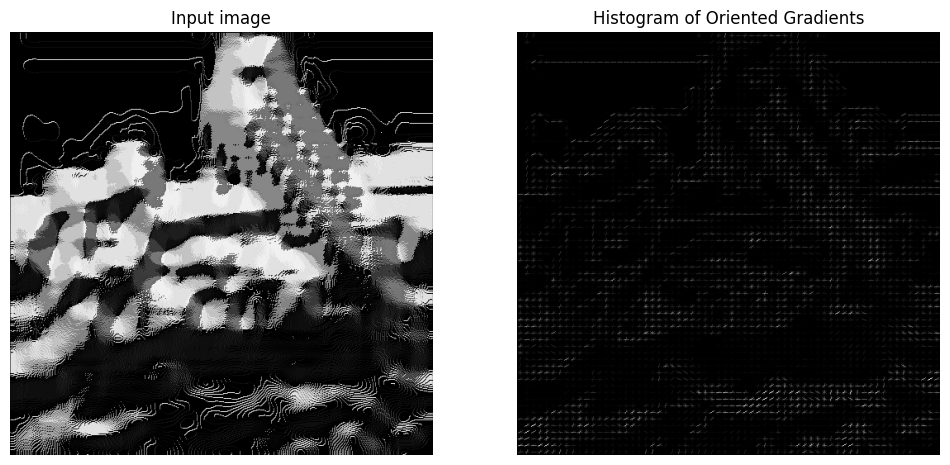

In [40]:
# Display HOG features for same image after computing LBP of each pixel

image_vis_hog = train_images[2]
image_vis_hog = cv2.resize(image_vis_hog, (512, 512), interpolation = cv2.INTER_CUBIC)
gray_vis_hog = gray_vis_sift = cv2.cvtColor(image_vis_hog,cv2.COLOR_BGR2GRAY)
gray_vis_hog = compute_lbp(gray_vis_hog)
fd, hog_image = hog(
    gray_vis_hog,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_vis_hog, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

/home/susheel/anaconda3/envs/CV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 29.99%
Confusion Matrix


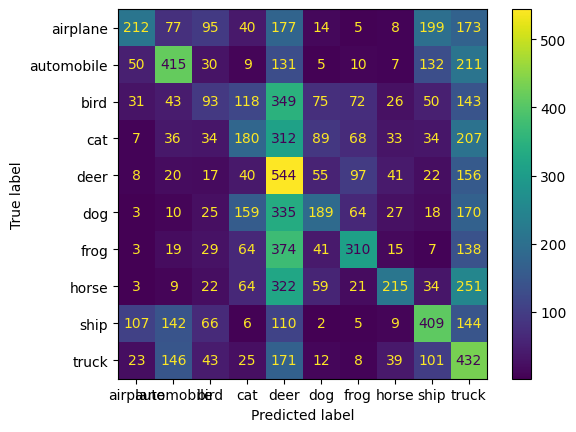

In [10]:
# Cell to extract HOG features of LBP images and perform classification using SVM 

# Define HOG parameters
orientations = 9
pixels_per_cell = (2, 2)
cells_per_block = (1, 1)

# Extract HOG features from training images
train_hog_features = []
for i in range(len(train_images)):
    temp_train = cv2.cvtColor(train_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_train)
    features = hog(image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block)
    train_hog_features.append(features)

# Stack HOG features
train_hog_features = np.vstack(train_hog_features)

# Define the number of clusters (visual words)
n_clusters = 200 # Number of clusters

# Create  K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Perform  K-Means clustering on the HOG features
kmeans.fit(train_hog_features)

# Generate histograms for training data
train_histograms = np.zeros((len(train_images), n_clusters), dtype=np.float32)

for i in range(len(train_images)):
    temp_train = cv2.cvtColor(train_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_train)

    features = hog(image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block)
    labels = kmeans.predict([features])
    train_histograms[i, labels] += 1.0

# Train an SVM classifier
clf = SVC(random_state=0, break_ties=True, gamma='auto')
clf.fit(train_histograms, train_labels)

# Generate histograms for test data
test_histograms = np.zeros((len(test_images), n_clusters), dtype=np.float32)

for i in range(len(test_images)):
    temp_test = cv2.cvtColor(test_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_test)

    features = hog(image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block)
    labels = kmeans.predict([features])
    test_histograms[i, labels] += 1.0

# Predict labels for test data
predicted_labels = clf.predict(test_histograms)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=name_classes)
print("Confusion Matrix")
cmd.plot()

/home/susheel/anaconda3/envs/CV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 36.70%
Confusion Matrix


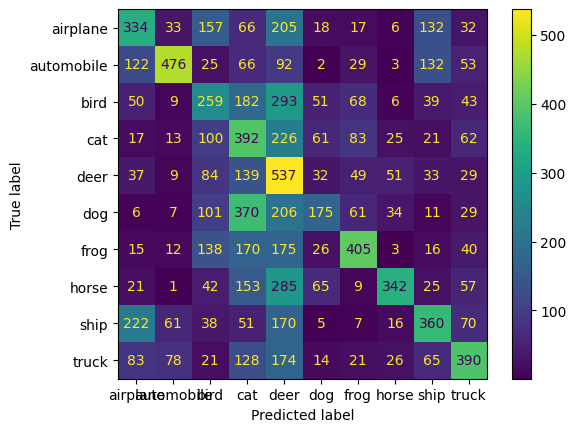

In [11]:
# Cell to extract HOG features of raw RGB images and perform classification using SVM 

# Define HOG parameters
orientations = 9
pixels_per_cell = (2, 2)
cells_per_block = (1, 1)


# Extract HOG features from training images
train_hog_features = []
for i in range(len(train_images)):
    image = train_images[i]

    features = hog(image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block, channel_axis=2)
    train_hog_features.append(features)

# Stack HOG features
train_hog_features = np.vstack(train_hog_features)

# Define the number of clusters (visual words)
n_clusters = 200 # Number of clusters

# Create  K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Perform  K-Means clustering on the HOG features
kmeans.fit(train_hog_features)

# Generate histograms for training data
train_histograms = np.zeros((len(train_images), n_clusters), dtype=np.float32)

for i in range(len(train_images)):
    train_image = train_images[i]
    features = hog(train_image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block, channel_axis=2)
    labels = kmeans.predict([features])
    train_histograms[i, labels] += 1.0

# Train an SVM classifier
clf = SVC(random_state=0, break_ties=True, gamma='auto')
clf.fit(train_histograms, train_labels)

# Generate histograms for test data
test_histograms = np.zeros((len(test_images), n_clusters), dtype=np.float32)

for i in range(len(test_images)):
    image = test_images[i]
    features = hog(image, orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block, channel_axis=2)
    labels = kmeans.predict([features])
    test_histograms[i, labels] += 1.0

# Predict labels for test data
predicted_labels = clf.predict(test_histograms)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=name_classes)
print("Confusion Matrix")
cmd.plot()

In [ ]:
# Cell to compute optical flow of video and map to original

def compute_optical_flow(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    # params for ShiTomasi corner detection
    feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (15, 15),
                    maxLevel = 2,
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    # p0 holds the keypoints that are tracked
    p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
    # Creating output video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 30, (old_frame.shape[1], old_frame.shape[0]))
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)
    # Read frames till video ends
    while(1):
        ret, frame = cap.read()
        if not ret:
            print('No frames grabbed!')
            break
        # Convert frame to grayscale before computing optical flow
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]
        # draw the tracks and circles
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        img = cv2.add(frame, mask)
        out.write(img)
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)
    cap.release()
    out.release()

if __name__ == "__main__":
    input_video_path = 'slow_traffic_small.mp4'
    output_video_path = 'slow_traffic_small_opflow.avi'
    compute_optical_flow(input_video_path, output_video_path)


Got descriptors


/home/susheel/anaconda3/envs/CV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans done
Got train histogram
Got test histograms
Accuracy: 28.91%
Confusion Matrix


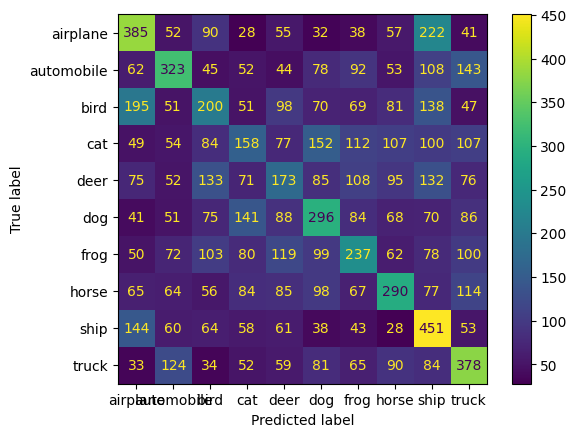

In [12]:
# Cell to extract SIFT features of raw RGB images and perform classification using SVM 

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features from training images and combine all descriptors
all_descriptors = []
for i in range(len(train_images)):
    image = train_images[i]
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        all_descriptors.extend(descriptors)

# Convert the list of descriptors to a NumPy array
all_descriptors = np.array(all_descriptors)

print('Got descriptors')
# Define the number of clusters (visual words) and create  K-Means
n_clusters = 200 # Number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Perform  K-Means clustering on all descriptors
kmeans.fit(all_descriptors)
print('Kmeans done')
# Generate histograms for training data based on the K-Means clusters
train_histograms = np.zeros((len(train_images), n_clusters), dtype=np.float32)

for i in range(len(train_images)):
    image = train_images[i]
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for label in labels:
            train_histograms[i, label] += 1.0
print('Got train histogram')
# Train an SVM classifier
clf = SVC(random_state=0, break_ties=True, gamma='auto')
clf.fit(train_histograms, train_labels)

# Generate histograms for test data
test_histograms = np.zeros((len(test_images), n_clusters), dtype=np.float32)
for i in range(len(test_images)):
    image = test_images[i]
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for label in labels:
            test_histograms[i, label] += 1.0
print("Got test histograms")

# Predict labels for test data
predicted_labels = clf.predict(test_histograms)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=name_classes)
print("Confusion Matrix")
cmd.plot()

Got descriptors


/home/susheel/anaconda3/envs/CV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans done
Got train histogram
Got test histograms
Accuracy: 23.54%
Confusion Matrix


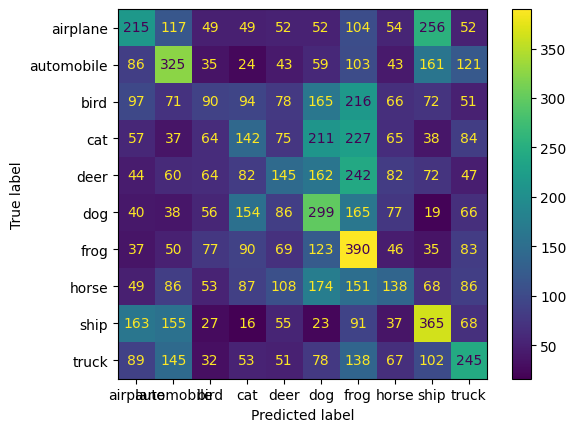

In [13]:
# Cell to extract SIFT features of LBP images and perform classification using SVM 

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features from training images and combine all descriptors
all_descriptors = []
for i in range(len(train_images)):
    temp_train = cv2.cvtColor(train_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_train)

    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        all_descriptors.extend(descriptors)

# Convert the list of descriptors to a NumPy array
all_descriptors = np.array(all_descriptors)

print('Got descriptors')
# Define the number of clusters (visual words) and create  K-Means
n_clusters = 200 # Number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Perform  K-Means clustering on all descriptors
kmeans.fit(all_descriptors)
print('Kmeans done')
# Generate histograms for training data based on the K-Means clusters
train_histograms = np.zeros((len(train_images), n_clusters), dtype=np.float32)

for i in range(len(train_images)):
    temp_train = cv2.cvtColor(train_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_train)

    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for label in labels:
            train_histograms[i, label] += 1.0 
print('Got train histogram')
# Train an SVM classifier
clf = SVC(random_state=0, break_ties=True, gamma='auto')
clf.fit(train_histograms, train_labels)

# Generate histograms for test data
test_histograms = np.zeros((len(test_images), n_clusters), dtype=np.float32)
print("Got test histograms")
for i in range(len(test_images)):
    temp_test = cv2.cvtColor(test_images[i], cv2.COLOR_RGB2GRAY)
    image = compute_lbp(temp_test)

    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for label in labels:
            test_histograms[i, label] += 1.0 

# Predict labels for test data
predicted_labels = clf.predict(test_histograms)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=name_classes)
print("Confusion Matrix")
cmd.plot()